#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Data understanding, preparation and EDA

### Reading the data

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### dropping insignificant columns - instant ,dteday, casual , registered

In [3]:
df = df.drop(labels=['instant','dteday','casual','registered'],axis=1)

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
#checking the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


- there are total 730 entries
- There are no null values in any of the columns


In [6]:
# checking for any outliers
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualizing the numerical data using pair plots 

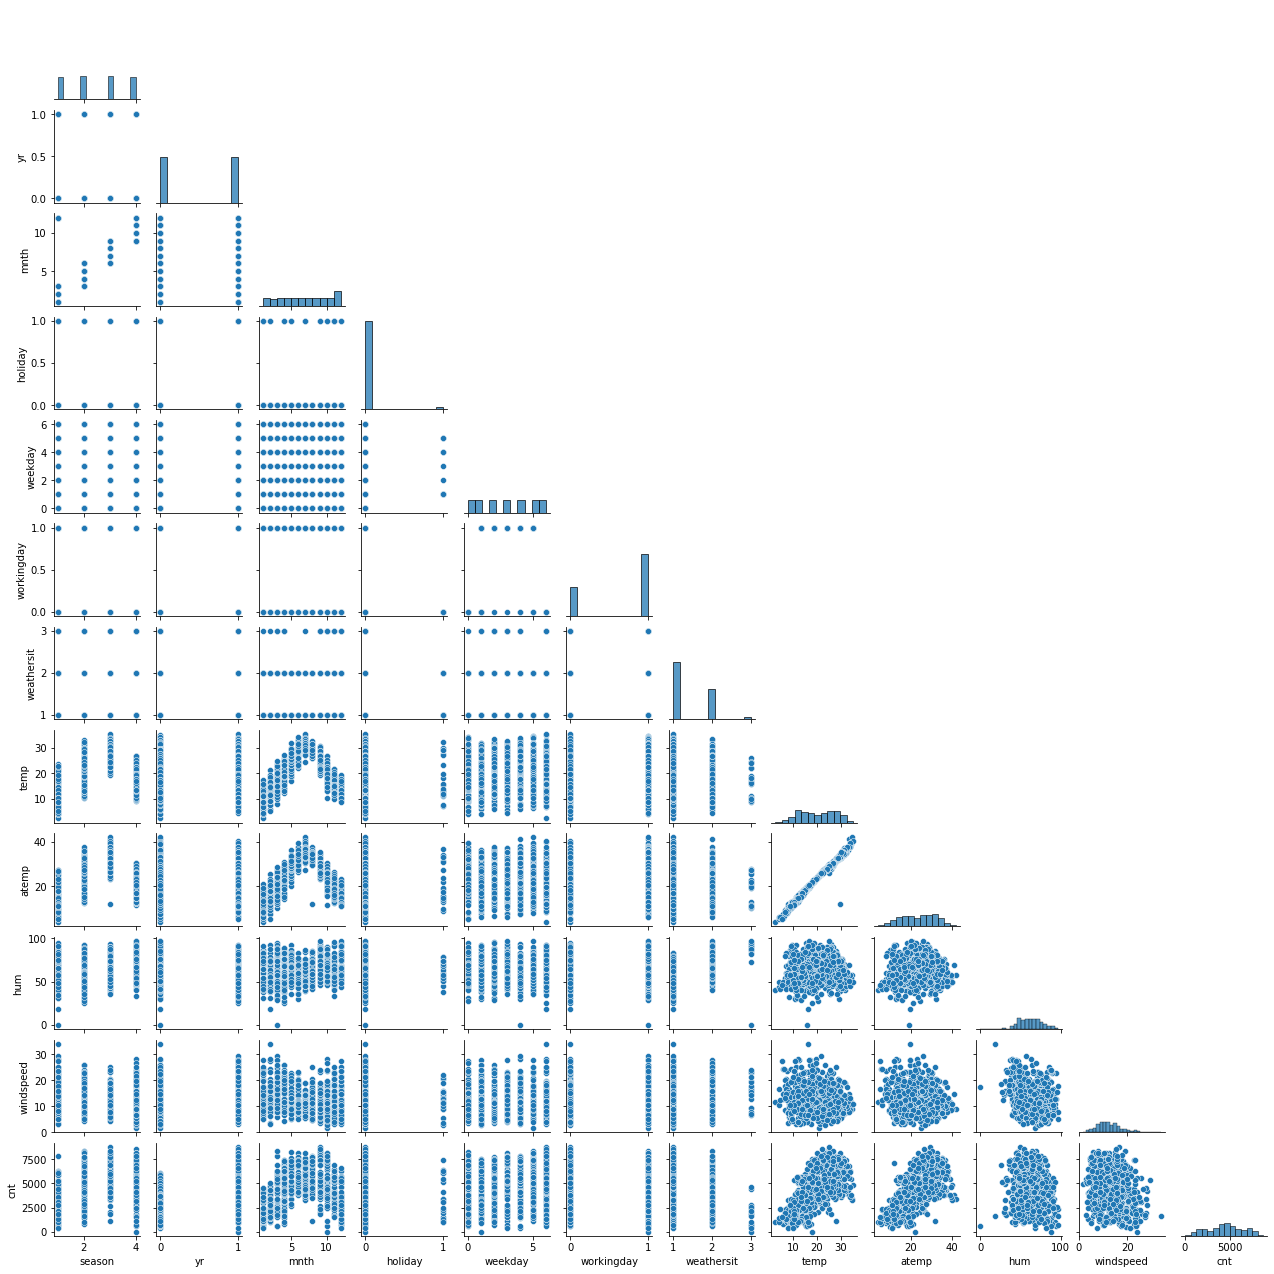

In [7]:
sns.pairplot(df,height=1.5,corner=True)

#### insights that we can get visually from the pair plots for numerical columns
- we can see that cnt has some kind of linear relation with temp and atemp
- No visual pattern between cnt and hum
- No visual pattern between cnt and windspeed

### Visualizing categorical variables

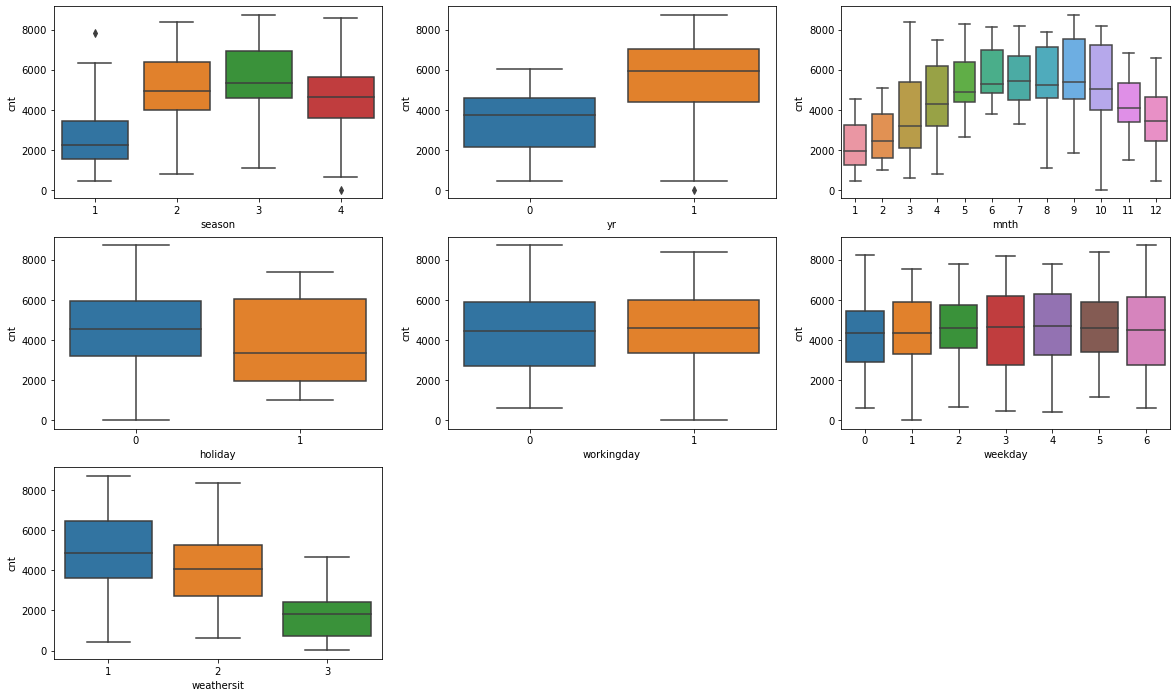

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Insights from the box plot
- most of the bookings were done in season 3(fall) and 2(summer)
- More bookings done in yr 1(2019)
- More bookings in the middle months
- more bookings when its not a holiday
- more booking on workingday
- bookings spread evenly between all weekdays
- more bookings when weathersit was 1(Clear, Few clouds, Partly cloudy, Partly cloudy) or 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)


### Data Preparation
#### Creating dummy variables for the below categorical nominal variables using one hot encoder method
 

In [9]:
# Creating dummy variable for weathersit

weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first = True)
weathersit_dummy.rename(columns={2:'2_Mist',3:'3_rain_snow'},inplace=True)
weathersit_dummy.head()

,2_Mist,3_rain_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [10]:
df = pd.concat([df, weathersit_dummy], axis = 1)
df=df.drop(labels=['weathersit'],axis=1)
df.head()


,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [11]:
# Creating dummy variable for weekday

weekday_dummy = pd.get_dummies(df['weekday'],drop_first = True)
weekday_dummy.rename(columns={1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'},inplace=True)
weekday_dummy.head()

,tue,wed,thu,fri,sat,sun
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [12]:
df = pd.concat([df, weekday_dummy], axis = 1)
df=df.drop(labels=['weekday'],axis=1)
df.head()


,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun
0,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1
1,1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0
2,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0
3,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0
4,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0


In [13]:
# Creating dummy variable for mnth

mnth_dummy = pd.get_dummies(df['mnth'],drop_first = True)

mnth_dummy.rename(columns={2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
mnth_dummy.head()

,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df = pd.concat([df, mnth_dummy], axis = 1)
df=df.drop(labels=['mnth'],axis=1)
df.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Creating dummy variable for season

season_dummy = pd.get_dummies(df['season'],drop_first = True)
season_dummy.rename(columns={2:'summer', 3:'fall', 4:'winter'},inplace=True)
season_dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
df = pd.concat([df, season_dummy], axis = 1)
df=df.drop(labels=['season'],axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec,summer,fall,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec,summer,fall,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### checking  the correlation coefficients to see which variables are highly correlated

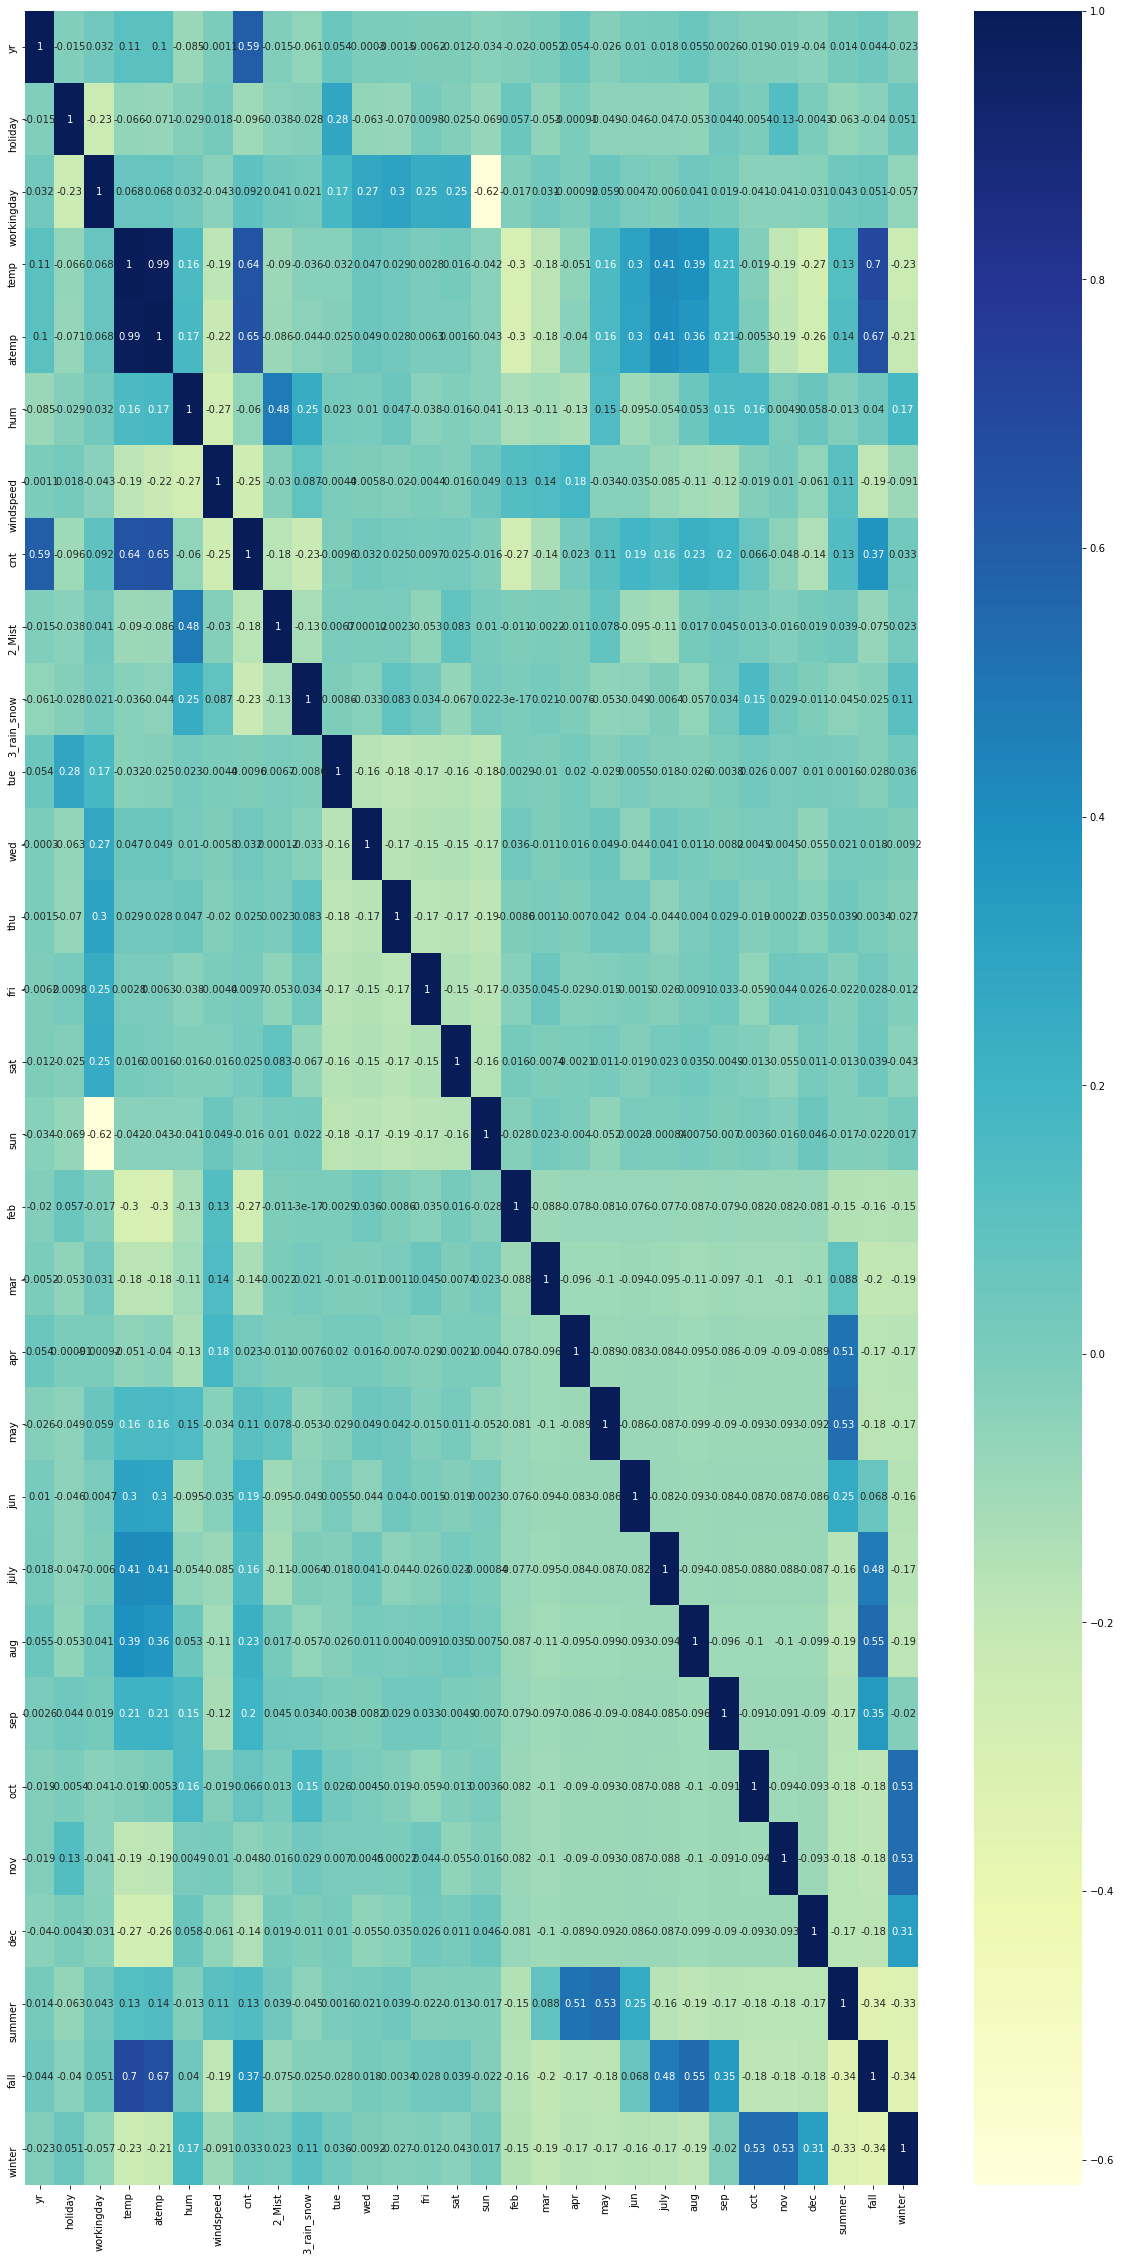

In [20]:
plt.figure(figsize = (20, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insights from correlation matrix
- atemp and temp are highly correlated
- cnt is highly correlated with temp
- cnt is highly correlated with yr

In [21]:
#dropping atemp since it is higly correlated with temp and both expresses the same thing
df_train = df_train.drop(labels=['atemp'],axis=1)

### Dividing into X(containing only the predictors) and Y(containing the target) sets for the model building

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec,summer,fall,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2_Mist', True, 1),
 ('3_rain_snow', True, 1),
 ('tue', False, 5),
 ('wed', False, 6),
 ('thu', False, 8),
 ('fri', False, 9),
 ('sat', False, 7),
 ('sun', True, 1),
 ('feb', True, 1),
 ('mar', True, 1),
 ('apr', True, 1),
 ('may', True, 1),
 ('jun', True, 1),
 ('july', False, 2),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 3),
 ('dec', False, 4),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '2_Mist',
       '3_rain_snow', 'sun', 'feb', 'mar', 'apr', 'may', 'jun', 'aug', 'sep',
       'oct', 'summer', 'fall', 'winter'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['tue', 'wed', 'thu', 'fri', 'sat', 'july', 'nov', 'dec'], dtype='object')

### model 1

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [30]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [31]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.04e-188
Time:                        17:00:38   Log-Likelihood:                 526.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1816      0.030      6.078      

In [32]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [33]:
get_vif_df(X_train_rfe)

,Features,VIF
0,const,58.68
1,fall,7.22
2,summer,5.72
3,temp,4.51
4,may,3.53
5,apr,3.19
6,winter,2.99
7,jun,2.32
8,hum,1.98
9,workingday,1.89


- we are gettign R-squared: 0.852 and Adj. R-squared: 0.846
- But there are few predictors with high VIF and high p values
- dropping those predictors one by one and re-running the model

### model 2
- dropping feb month as its p-value is greater than 0.05 and is insignificant

In [34]:
X_train_new = X_train_rfe.drop(["feb"], axis = 1)

In [35]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.75e-189
Time:                        17:00:38   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1908      0.029      6.576      

### model 3
- dropping "jun" month as its p-value is greater than 0.05 and is insignificant

In [36]:
X_train_new = X_train_new.drop(["jun"], axis = 1)

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-189
Time:                        17:00:39   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1925      0.029      6.625      

### model 4
- dropping "apr" month as its p-value is greater than 0.05 and is insignificant

In [38]:
X_train_new = X_train_new.drop(["apr"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.51e-190
Time:                        17:00:39   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1944      0.029      6.711      

### model 5
- dropping "may" month as its p-value is greater than 0.05 and is insignificant

In [39]:
X_train_new = X_train_new.drop(["may"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.93e-191
Time:                        17:00:39   Log-Likelihood:                 521.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1888      0.029      6.545      

### model 6
- dropping "fall" season as its p-value is greater than 0.05 and is insignificant

In [40]:
X_train_new = X_train_new.drop(["fall"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.47e-191
Time:                        17:00:39   Log-Likelihood:                 520.35
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -940.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1894      0.029      6.554      

### model 7
- dropping "mar" month as its p-value is greater than 0.05 and is insignificant

In [41]:
X_train_new = X_train_new.drop(["mar"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.24e-192
Time:                        17:00:39   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1945      0.029      6.770      

In [42]:
#checking the multi-collinearity among the predictors
get_vif_df(X_train_new)

,Features,VIF
0,const,53.47
1,workingday,1.88
2,hum,1.88
3,sun,1.79
4,winter,1.72
5,temp,1.59
6,2_Mist,1.57
7,oct,1.49
8,aug,1.46
9,summer,1.38


- Now the VIFs and p-values both are within acceptable range. So we will go ahead and make our predictions using this model only.
- R-squared: 0.848 and Adj. R-squared: 0.844 which is also good 

### Residual Analysis of the train data

In [43]:
y_train_cnt = lm.predict(X_train_lm)

In [44]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Residual(Error Terms)')

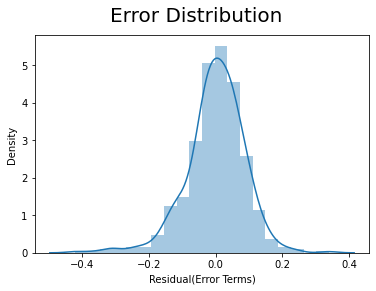

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual(Error Terms)', fontsize = 10)                         # X-label

- The above graph tells us that the error is normally distributed around 0 

Text(0, 0.5, 'Error')

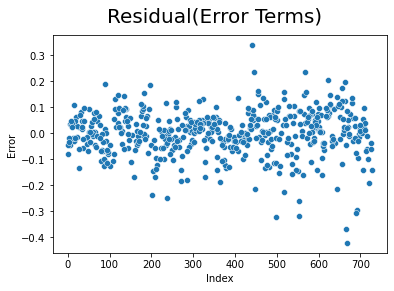

In [46]:
sns.scatterplot(data = y_train - y_train_cnt)
plt.suptitle('Residual(Error Terms)', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Error', fontsize = 10)

- the errors are distributed throughout and are independent

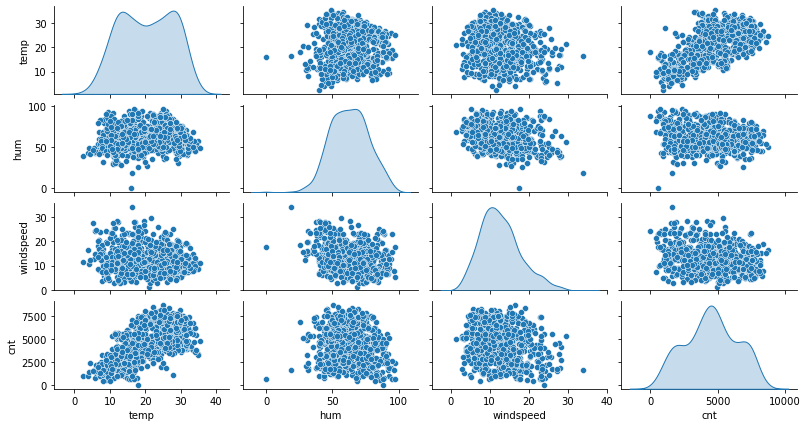

In [47]:
#plt.figure(figsize = (1, 1))
df_temp=df[[ 'temp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_temp, diag_kind='kde',height=1.5,aspect=1.9)
plt.show()

- There is a linear relationship between predictor  and target variable

### Making Predictions
- Applying the same transformations which we applied to the Training dataset

In [48]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_Mist,3_rain_snow,tue,wed,thu,fri,sat,sun,feb,mar,apr,may,jun,july,aug,sep,oct,nov,dec,summer,fall,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [49]:
df_test = df_test.drop(labels=['atemp'],axis=1)
y_test = df_test.pop('cnt')
X_test = df_test


In [50]:
# getting the predictors that were selected in the final model
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       '2_Mist', '3_rain_snow', 'sun', 'aug', 'sep', 'oct', 'summer',
       'winter'],
      dtype='object')

In [51]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [52]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [53]:
# Making predictions
y_pred = lm.predict(X_test_new)

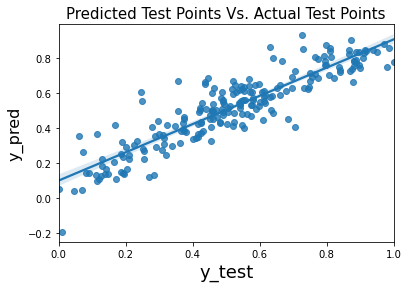

In [54]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 15})             # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

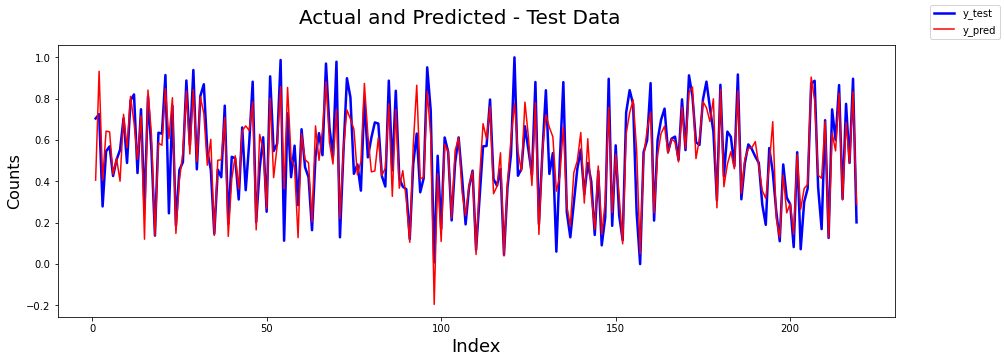

In [55]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted - Test Data ', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Counts', fontsize=16)
fig.legend(labels=('y_test','y_pred'))

- We can see predictions are very close to actuals

#### Checking the R squared for the test set

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8131074959531347

#### Checking the adjusted R squared 

In [57]:
X_test.shape

(219, 28)

In [58]:
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7855654427251756

In [59]:
%%html
<style>
table {float:left}
</style>

### Final Result

|                    | Training Data | Test Data |
|--------------------|---------------|-----------|
| R squared          | 0.848         | 0.8131    |
| Adjusted R squared | 0.844         | 0.7855    |

- these are reasonably good values and we have a good descent model

####  equation of the best fitted line
 cnt = 0.1945 + ( 0.2292 * yr )+ (-0.0558 * holiday )+ ( 0.0444 * workingday )+ ( 0.5301 * temp )+ ( -0.1692 * hum )+
       ( -0.1857 * windspeed )+ ( -0.0582 * 2_Mist) + ( -0.2486 * 3_rain_snow )+ ( 0.0529 * sun )+ ( 0.056 * aug )+
       ( 0.1255 * sep )+ ( 0.0411 * oct )+ ( 0.1039 * summer )+ ( 0.1348 * winter )
       
#### The best predictors that business can look upon 

#### For numerical values
- **temp** - with unit increase in temp the cnt increases by .53 times
- **yr** - as yr increases by a unit, the cnt increases by 0.22 times
- **hum** - as humidity increases by a unit, then cnt decreases by 0.16 times
- **windspeed** - as windspeed increases by a unit, then cnt decreases by 0.18 times

#### For Categorical variables
- **winter** - when effects of season is taken into account, winter will increase the cnt by 0.13 times than the reference group (spring)
- **sep** - when effects of months is taken into account, sep will increase the cnt by 0.12 times than the reference group (january)
- **summer** - when effects of season is taken into account, summer will increase the cnt by 0.10 times than the reference group (spring)
- **aug** - when effects of months are is into account, aug will increase the cnt by 0.05 times than the reference group (january)
- **sun** - when effects of weekday are is into account, sun will increase the cnt by 0.05 times than the reference group (monday)
- **workingday** -  the cnt will increase by 0.04 times when its a workingday
- **oct** - when effects of months is taken into account, oct will increase the cnt by 0.04 times than the reference group (january)
- **holiday** - the cnt will decrease by 0.05 times when its a holiday
- **weathersit(2)** - when effects of weather status is taken into account, cnt will decrease by  0.05 times than the reference group (Clear, Few clouds, Partly cloudy, Partly cloudy) when weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- **weathersit(3)** - when effects of weather status is taken into account, cnt will decrease by  0.24 times than the reference group (Clear, Few clouds, Partly cloudy, Partly cloudy) when weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds